<a href="https://colab.research.google.com/github/patelmedha/project2/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STROKE PREDICTION

In [2]:
#Imports
## Pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Numpy
import numpy as np

##Seaborn
import seaborn as sns

##Matplotlib
import matplotlib.pyplot as plt

# CHOICE 1: Stroke Prediction
**Context**
  - According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
  

1. Source of data
  - Source : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. Brief description of data
 - - This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

3. What is the target?
  - Target column is stroke. Predicting whether patient will suffer from a stroke or not.
   

4. What does one row represent? (A person? A business? An event? A product?)

    - **Attribute Information**
  1. id: unique identifier
  2. gender: "Male", "Female" or "Other"
  3. age: age of the patient
  4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
  5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
  6. ever_married: "No" or "Yes"
  7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
  8. Residence_type: "Rural" or "Urban"
  9. avg_glucose_level: average glucose level in blood
  10. bmi: body mass index
  11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
  12. stroke: 1 if the patient had a stroke or 0 if not
  
  *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

5. Is this a classification or regression problem?
  - Classification problem

6. How many features does the data have?
  - 11 features

7. How many rows are in the dataset?
  - 5110 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - This data  has 201 missing values in the BMI column.

## Load Data and Inspect Data

In [3]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')

stroke_fpath = '/content/drive/MyDrive/CodingDojo/PROJECT 2/healthcare-dataset-stroke-data.csv'
df_stroke = pd.read_csv(stroke_fpath)
df_stroke.head()

Mounted at /content/drive


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Display number of rows and columns for the dataframe
print(f'There are {df_stroke.shape[0]} rows, and {df_stroke.shape[1]} columns.')
print(f'The rows represent {df_stroke.shape[0]} observations, and the columns represent {df_stroke.shape[1]-1} features and 1 target variable.')


There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [5]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Duplicated Data

In [6]:
#Duplicate Rows
df_stroke.duplicated().sum().sum()

0

- There are no duplicate rows to drop.

### Missing Values

In [7]:
#Missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#Missing Values in Percent
df_stroke.isna().sum()/100

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  2.01
smoking_status       0.00
stroke               0.00
dtype: float64

<Axes: >

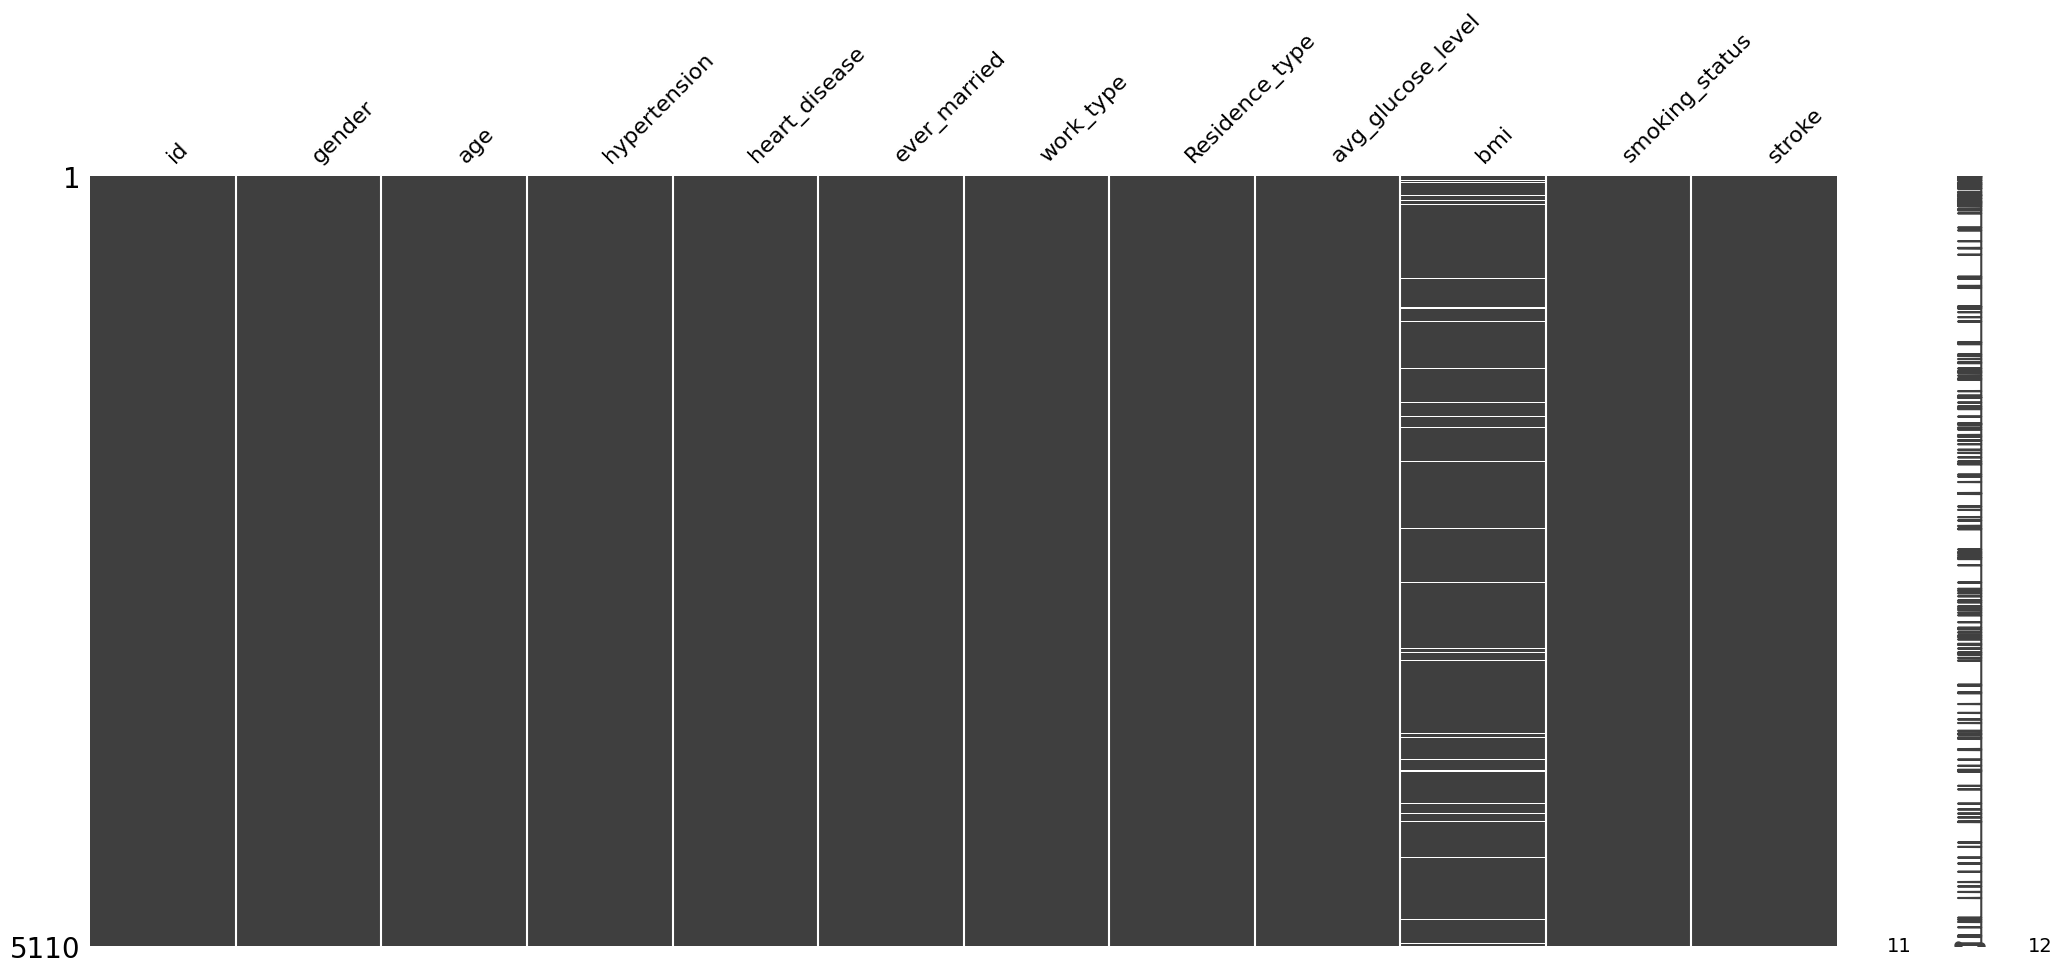

In [9]:
#Visualizing Missing Values with Missingno
import missingno as msno
msno.matrix(df_stroke)

- BMI - 2.01% missing values
  - Dropping these rows can be justified since less than 5% data is missing.

In [10]:
df_stroke.dropna(subset=['bmi'],inplace=True)

In [11]:
#Missing Values in Percent
df_stroke.isna().sum()/100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

### Unique Values

In [12]:
df_stroke.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
df_stroke.nunique()/len(df_stroke) * 100


id                   100.000000
gender                 0.061112
age                    2.118558
hypertension           0.040741
heart_disease          0.040741
ever_married           0.040741
work_type              0.101854
Residence_type         0.040741
avg_glucose_level     78.468120
bmi                    8.514972
smoking_status         0.081483
stroke                 0.040741
dtype: float64

- id column has 100% unique values- this column can be dropped.

In [14]:
df_stroke.drop(columns= 'id', inplace=True)
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


### Data Consistency

#### Categorical Columns

In [15]:
#Save list for categorical column name.
cat_col = df_stroke.select_dtypes('object').columns
cat_col

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [16]:
#Check for nunique for categorical columns
for col in cat_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')


Value Counts for gender
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3204
No     1705
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64




#### Numeric Columns

In [17]:
#Save list for numeric column name.
num_col = df_stroke.select_dtypes(['int', 'float']).columns
num_col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [18]:
#Check for nunique for categorical columns
for col in num_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')

Value Counts for age
78.00    93
57.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: age, Length: 104, dtype: int64


Value Counts for hypertension
0    4458
1     451
Name: hypertension, dtype: int64


Value Counts for heart_disease
0    4666
1     243
Name: heart_disease, dtype: int64


Value Counts for avg_glucose_level
93.88     6
72.49     5
83.16     5
73.00     5
91.68     5
         ..
72.06     1
97.90     1
230.59    1
224.63    1
85.28     1
Name: avg_glucose_level, Length: 3852, dtype: int64


Value Counts for bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


Value Counts for stroke
0    4700
1     209
Name: stroke, dtype: int64




#### Summary Statistic for Numeric Columns
  - For any numeric columns obtain the summary statistics of each(min,max,mean).

In [19]:
#Descriptive Summary for numerical columns
df_stroke.describe(include='number')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Exploratory Data Analysis

##### Categorical Columns


###### EDA function for Categorical Columns

In [20]:
#Using EDA function from the LP
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None, rot1 = 45):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation= rot1, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

###### 'gender'

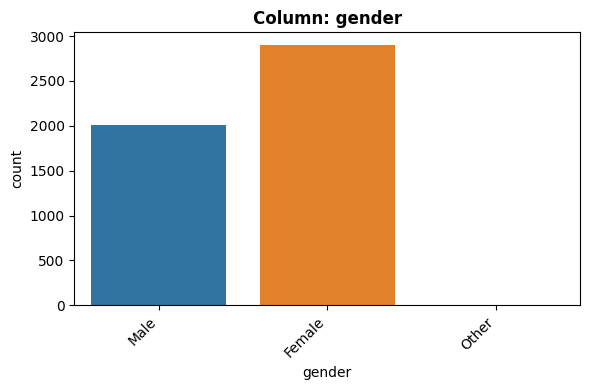

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Female' occurs 2897 times (59.01%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: gender'}, xlabel='gender', ylabel='count'>)

In [21]:
explore_categorical(df_stroke, 'gender')

###### 'ever_married'

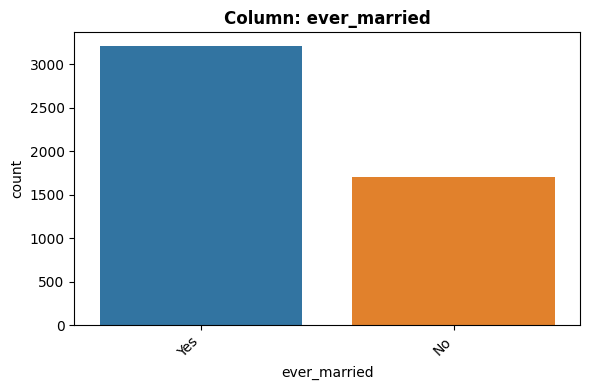

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Yes' occurs 3204 times (65.27%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: ever_married'}, xlabel='ever_married', ylabel='count'>)

In [22]:
explore_categorical(df_stroke, 'ever_married')

###### 'work_type'

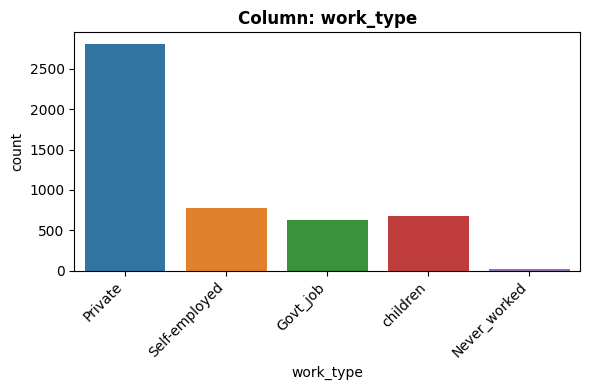

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Private' occurs 2811 times (57.26%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: work_type'}, xlabel='work_type', ylabel='count'>)

In [23]:
explore_categorical(df_stroke, 'work_type')

###### 'Residence_type'

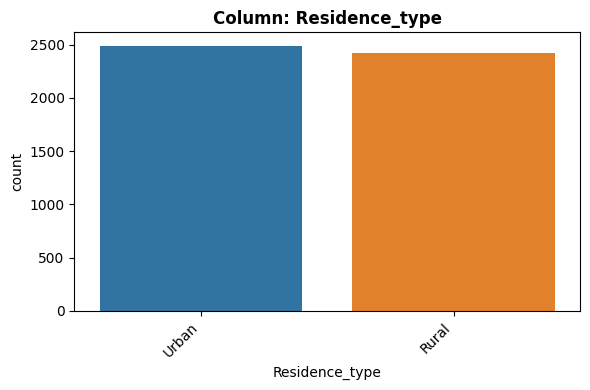

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Urban' occurs 2490 times (50.72%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Residence_type'}, xlabel='Residence_type', ylabel='count'>)

In [24]:
explore_categorical(df_stroke, 'Residence_type')

###### 'smoking_status'

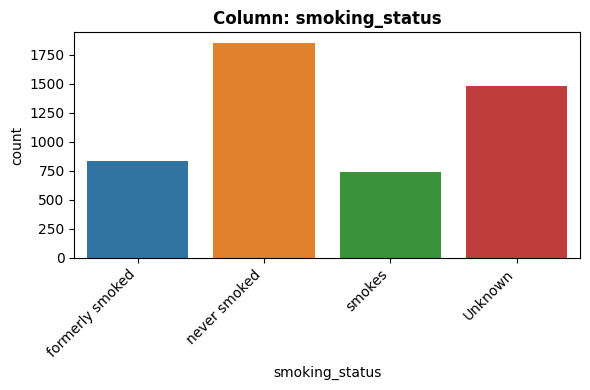

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1852 times (37.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: smoking_status'}, xlabel='smoking_status', ylabel='count'>)

In [25]:
explore_categorical(df_stroke, 'smoking_status')

##### Numeric Columns

###### EDA function for Numeric Columns

In [26]:
#Using EDA function from the LP
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

###### 'age'

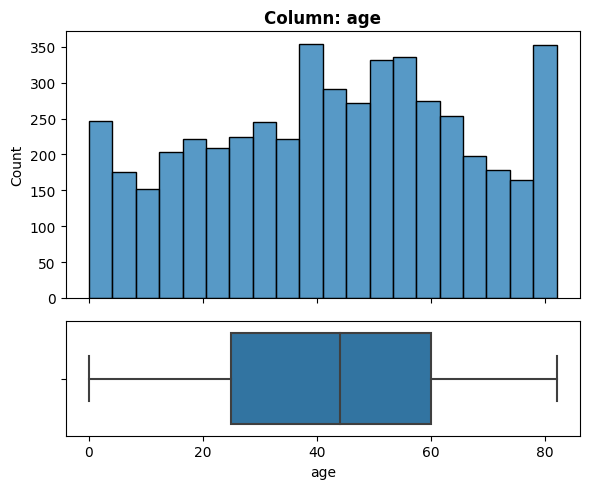

- NaN's Found: 0 (0.0%)


In [27]:
explore_numeric(df_stroke, 'age')

###### 'hypertension'

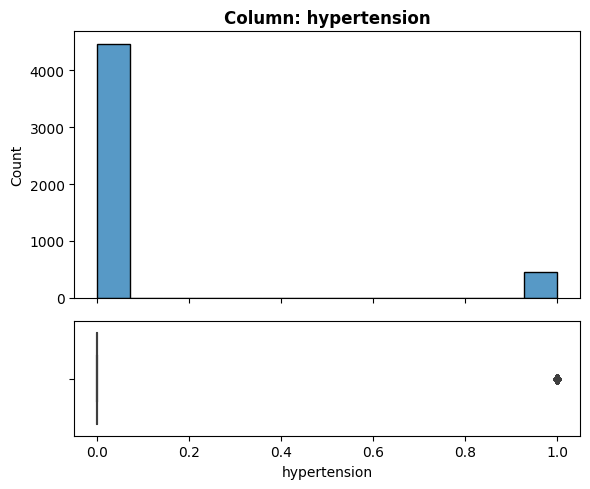

- NaN's Found: 0 (0.0%)


In [28]:
explore_numeric(df_stroke, 'hypertension')

###### 'heart_disease'

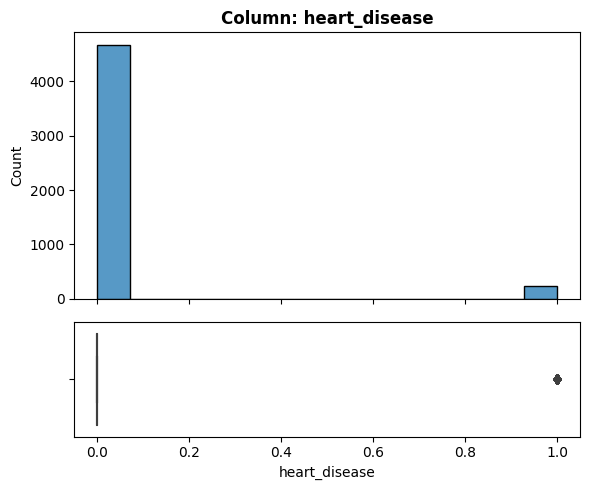

- NaN's Found: 0 (0.0%)


In [29]:
explore_numeric(df_stroke, 'heart_disease')

###### 'avg_glucose_level'

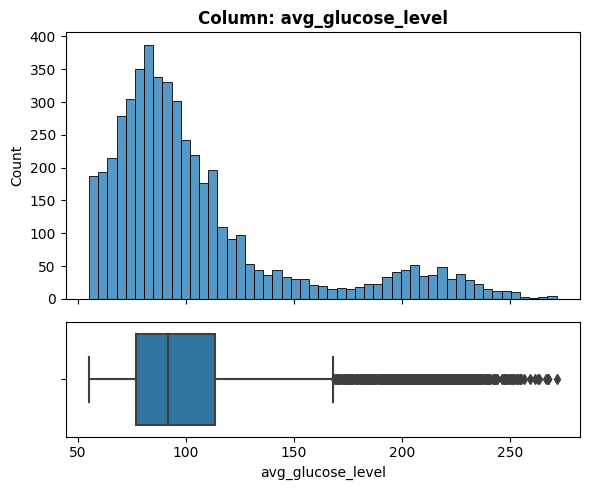

- NaN's Found: 0 (0.0%)


In [30]:
explore_numeric(df_stroke, 'avg_glucose_level')

###### 'bmi'

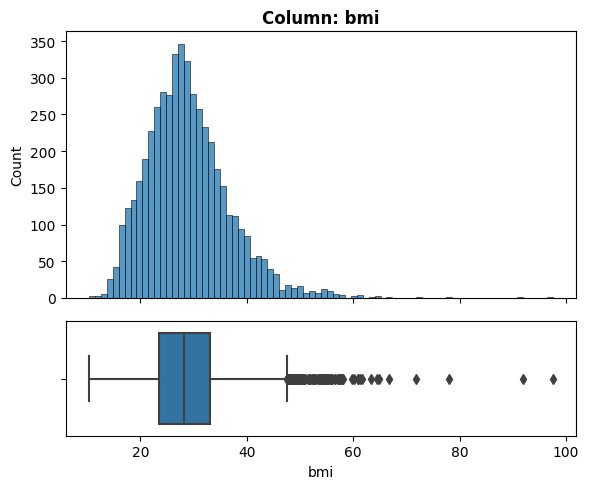

- NaN's Found: 0 (0.0%)


In [31]:
explore_numeric(df_stroke, 'bmi')

###### 'stroke'

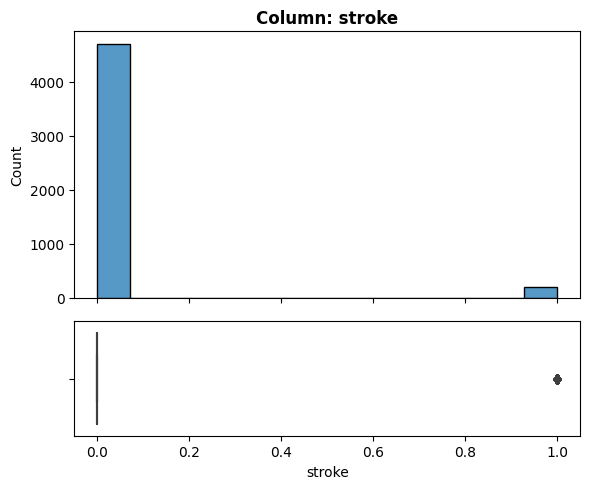

- NaN's Found: 0 (0.0%)


In [32]:
explore_numeric(df_stroke, 'stroke')

###**Correlation**

####.corr() method

In [33]:
#To check all numeric features in the dataframe for correlations, use df.corr()
corr = df_stroke.corr()

corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


####Heatmap of Correlations

- Heatmap of correlations will display any correlation between numeric features.

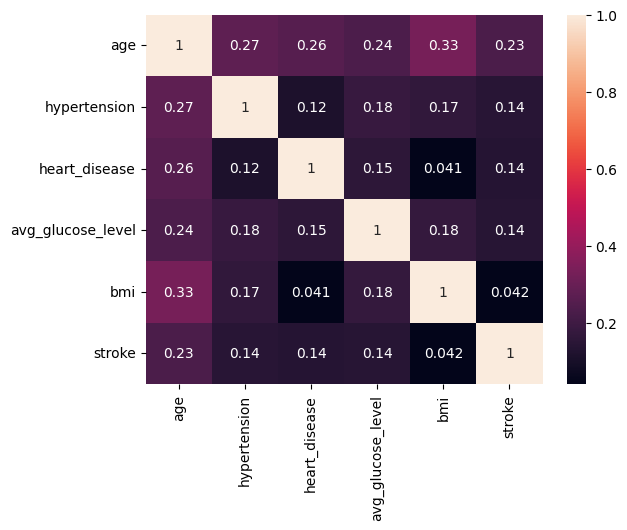

In [34]:
##Define Matplotlib fix and ax objects using plt.subplots()
## Use figsize= to set the size of the figure
fig, ax = plt.subplots()

##Define Matplotlib ax object using sns.heatmap()
##Use cmap= to define the color map
##Use annot= to annotate the correlation values
ax = sns.heatmap(corr, cmap = 'rocket', annot = True);

Interpretation of Heatmap:
  - The highest correlation is between 'bmi' and 'age'.
  - I also notice that all features seem to have a high correlation to 'age'.

# **Explanatory Data Analysis**


##How does Age and BMI correlate to suffering from a stroke?


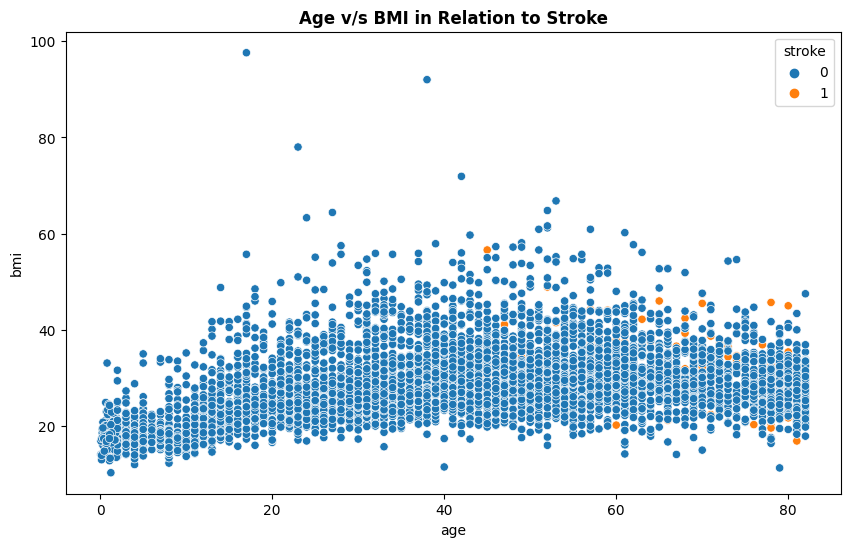

In [35]:
#Plotting Age and BMI values in relation to stroke.
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(df_stroke, x="age", y="bmi", hue="stroke")
ax.set_title("Age v/s BMI in Relation to Stroke", fontweight="bold");

**Observations**
  - Majority of the people who suffer from a stroke are those who are 60 years and older.

##How does Age and Hypertension correlate to suffering from a stroke?

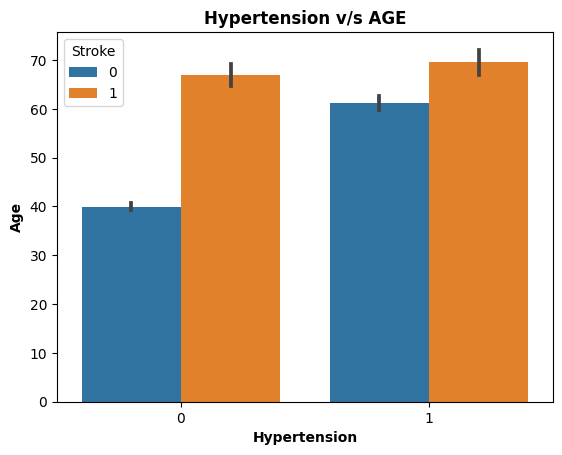

In [41]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, ax = plt.subplots()

## Define a MatplotLib ax object using sns.barplot()
ax = sns.barplot(data = df_stroke,
                 x= 'hypertension',
                 y='age', hue='stroke')

## Set the Title
ax.set_title('Hypertension v/s AGE', fontsize=12, fontweight='bold')
## Set the X axis label
ax.set_xlabel('Hypertension', fontsize=10, fontweight='bold')
## Set the Y axis label
ax.set_ylabel('Age', fontsize=10, fontweight='bold')
## Plot Legend
plt.legend(title='Stroke')
plt.show()
## Set the legend location to [1,1]
ax.legend(bbox_to_anchor=[1,1]);

**Observations**
  - We can see that those people who suffered from a stroke regardless of whether they have Hypertension or not, are at an average age of 65 years and older.

##How does Heart Disease relate to suffering from a stroke?

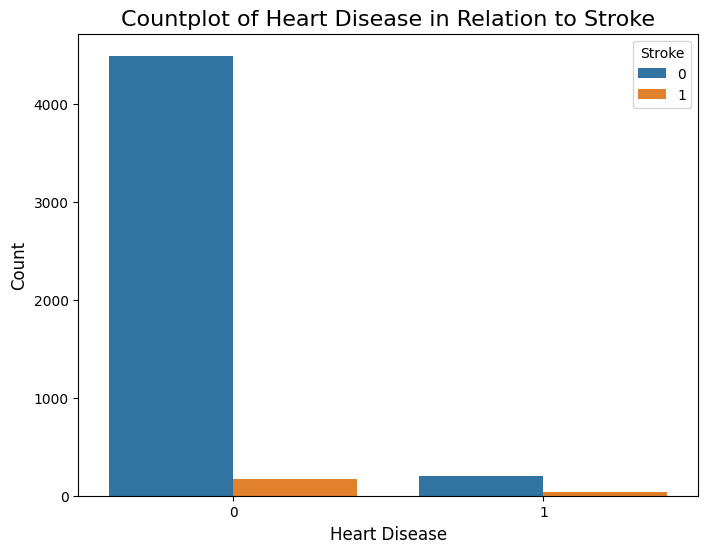

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', hue='stroke', data=df_stroke)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Heart Disease in Relation to Stroke', fontsize=16)
plt.legend(title='Stroke')
plt.show()

**Observations**
- As expected those with no heart disease have a higher count of not suffering from a stroke.
- However, the least count showed up for those who have heart disease and suffered from a strok.

##How does Work Type relate to suffering from a stroke?

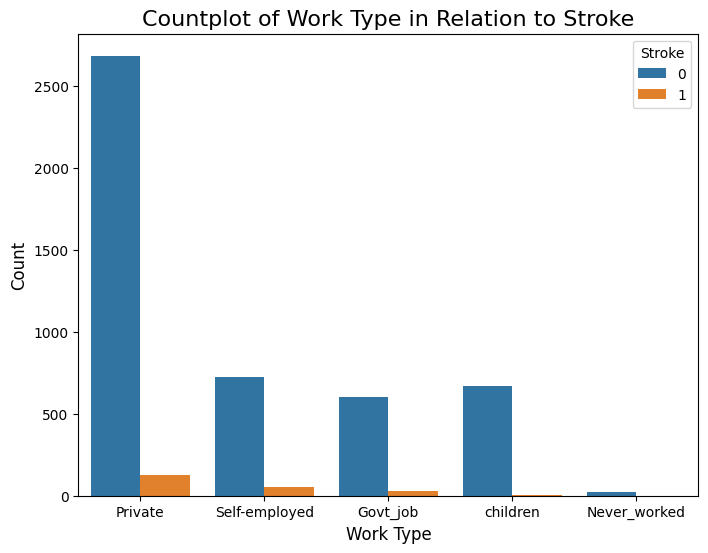

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type', hue='stroke', data=df_stroke)
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Work Type in Relation to Stroke', fontsize=16)
plt.legend(title='Stroke')
plt.show()

**Observations**
- Those working in the private sector are more like to suffer from a stroke.

##How does Smoking Status relate to suffering from a stroke?

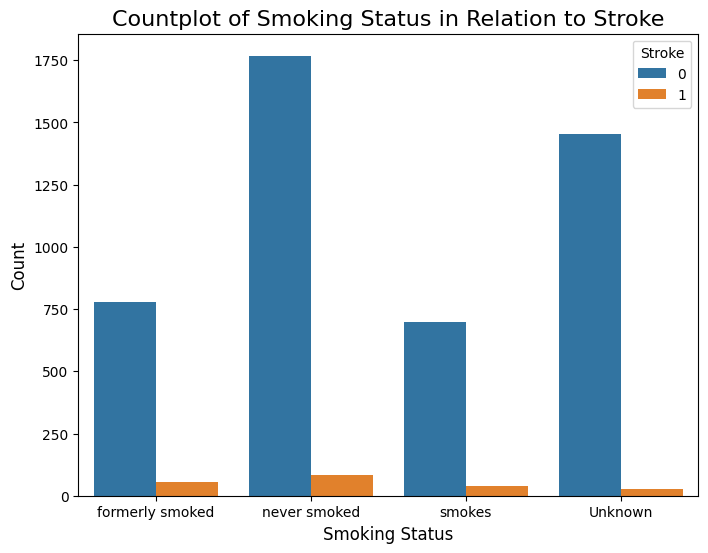

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', hue='stroke', data=df_stroke)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Smoking Status in Relation to Stroke', fontsize=16)
plt.legend(title='Stroke')
plt.show()

**Observations**
- Surprisingly, the highest count is for those who suffer from a stroke are those who are non-smokers.